In [1]:
import logging
import numpy as np
import pandas as pd
from arch import arch_model
from random import gauss
from random import seed
from matplotlib import pyplot as plt
import scipy.stats as sts

In [3]:
from rules_related import combine_rules_outputs
from whole_algorithm import train_model
from auxiliary import calc_log_returns
from multivariate_normal_distribution import LongMultivariateNormal

# Testing GARCH

## #1 increasing dispersion, increments are normal

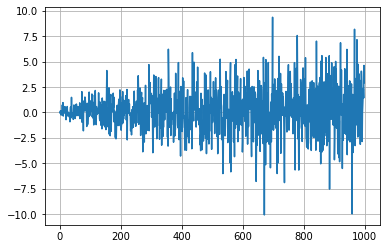

In [4]:
# create dataset
variance = np.arange(0, 10, .01)
# data = [gauss(0, var) for var in variance]
data = [sts.norm(0, var ** .5).rvs(1) for var in variance]

# plot
plt.plot(data)

plt.grid()
plt.show()

In [5]:
n_test = 100

train, test = data[:-n_test], data[-n_test:]

In [6]:
p = 1
q = 1

In [7]:
model = arch_model(train, mean='Zero', vol='GARCH', p=p, q=q, dist='normal')

In [8]:
fitted = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 13699.854380874032
Iteration:      2,   Func. Count:     10,   Neg. LLF: 13699.894471956688
Iteration:      3,   Func. Count:     15,   Neg. LLF: 1814.2380350214708
Iteration:      4,   Func. Count:     19,   Neg. LLF: 1854.0642483942622
Iteration:      5,   Func. Count:     26,   Neg. LLF: 1985.0789608702514
Iteration:      6,   Func. Count:     35,   Neg. LLF: 1806.6842898444065
Iteration:      7,   Func. Count:     39,   Neg. LLF: 1806.0907014907752
Iteration:      8,   Func. Count:     43,   Neg. LLF: 1805.302200665952
Iteration:      9,   Func. Count:     47,   Neg. LLF: 1804.7580860157416
Iteration:     10,   Func. Count:     51,   Neg. LLF: 1804.801199057606
Iteration:     11,   Func. Count:     56,   Neg. LLF: 3888.622738407007
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1804.742221658504
            Iterations: 12
            Function evaluations: 63
            Gradient evaluat

In [9]:
fitted.summary

<bound method ARCHModelResult.summary of                        Zero Mean - GARCH Model Results                        
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -1804.74
Distribution:                  Normal   AIC:                           3615.48
Method:            Maximum Likelihood   BIC:                           3629.89
                                        No. Observations:                  900
Date:                Mon, Oct 18 2021   Df Residuals:                      900
Time:                        22:25:07   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      9.0

In [10]:
fitted.params

omega       0.009048
alpha[1]    0.000002
beta[1]     0.999998
Name: params, dtype: float64

In [11]:
forecast = fitted.forecast(reindex=False, horizon=n_test)

In [12]:
forecast.residual_variance.values[0]

array([8.29490964, 8.30395511, 8.31300059, 8.32204606, 8.33109152,
       8.34013699, 8.34918245, 8.35822791, 8.36727336, 8.37631882,
       8.38536427, 8.39440971, 8.40345516, 8.4125006 , 8.42154604,
       8.43059147, 8.43963691, 8.44868234, 8.45772776, 8.46677319,
       8.47581861, 8.48486403, 8.49390944, 8.50295485, 8.51200026,
       8.52104567, 8.53009108, 8.53913648, 8.54818187, 8.55722727,
       8.56627266, 8.57531805, 8.58436344, 8.59340882, 8.6024542 ,
       8.61149958, 8.62054496, 8.62959033, 8.6386357 , 8.64768106,
       8.65672643, 8.66577179, 8.67481715, 8.6838625 , 8.69290785,
       8.7019532 , 8.71099855, 8.72004389, 8.72908923, 8.73813457,
       8.74717991, 8.75622524, 8.76527057, 8.77431589, 8.78336122,
       8.79240654, 8.80145186, 8.81049717, 8.81954248, 8.82858779,
       8.8376331 , 8.8466784 , 8.8557237 , 8.864769  , 8.87381429,
       8.88285958, 8.89190487, 8.90095016, 8.90999544, 8.91904072,
       8.928086  , 8.93713127, 8.94617654, 8.95522181, 8.96426

In [13]:
forecast.variance.values[0]

array([8.29490964, 8.30395511, 8.31300059, 8.32204606, 8.33109152,
       8.34013699, 8.34918245, 8.35822791, 8.36727336, 8.37631882,
       8.38536427, 8.39440971, 8.40345516, 8.4125006 , 8.42154604,
       8.43059147, 8.43963691, 8.44868234, 8.45772776, 8.46677319,
       8.47581861, 8.48486403, 8.49390944, 8.50295485, 8.51200026,
       8.52104567, 8.53009108, 8.53913648, 8.54818187, 8.55722727,
       8.56627266, 8.57531805, 8.58436344, 8.59340882, 8.6024542 ,
       8.61149958, 8.62054496, 8.62959033, 8.6386357 , 8.64768106,
       8.65672643, 8.66577179, 8.67481715, 8.6838625 , 8.69290785,
       8.7019532 , 8.71099855, 8.72004389, 8.72908923, 8.73813457,
       8.74717991, 8.75622524, 8.76527057, 8.77431589, 8.78336122,
       8.79240654, 8.80145186, 8.81049717, 8.81954248, 8.82858779,
       8.8376331 , 8.8466784 , 8.8557237 , 8.864769  , 8.87381429,
       8.88285958, 8.89190487, 8.90095016, 8.90999544, 8.91904072,
       8.928086  , 8.93713127, 8.94617654, 8.95522181, 8.96426

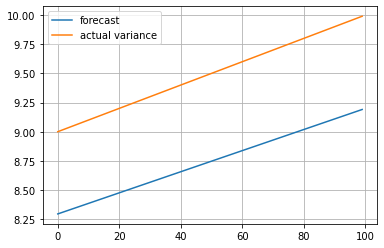

In [14]:
plt.plot(_, label='forecast')
plt.plot(variance[-n_test:], label='actual variance')

plt.legend()
plt.grid()
plt.show()

In [15]:
help(fitted.forecast)

Help on method forecast in module arch.univariate.base:

forecast(params: 'Optional[ArrayLike1D]' = None, horizon: 'int' = 1, start: 'Union[int, DateLike]' = None, align: "Literal['origin', 'target']" = 'origin', method: 'ForecastingMethod' = 'analytic', simulations: 'int' = 1000, rng: 'Optional[Callable[[Union[int, Tuple[int, ...]]], Float64Array]]' = None, random_state: 'Optional[np.random.RandomState]' = None, *, reindex: 'Optional[bool]' = None, x: 'Union[None, Dict[Label, ArrayLike], ArrayLike]' = None) -> 'ARCHModelForecast' method of arch.univariate.base.ARCHModelResult instance
    Construct forecasts from estimated model
    
    Parameters
    ----------
    params : ndarray, optional
        Alternative parameters to use.  If not provided, the parameters
        estimated when fitting the model are used.  Must be identical in
        shape to the parameters computed by fitting the model.
    horizon : int, optional
       Number of steps to forecast
    start : {int, datetim

## #2 white noise (Wiener process) 

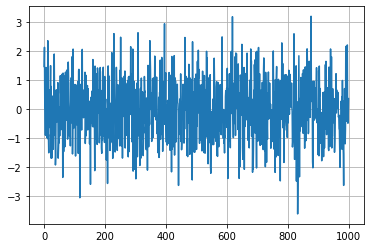

In [16]:
# create dataset
sample_size = 1000
mean = 0
variance = 1
# data = [sts.norm(0, var ** .5).rvs(1) for var in variance]
data = sts.norm(mean, variance ** .5).rvs(sample_size)

# plot
plt.plot(data)

plt.grid()
plt.show()

In [17]:
n_test = int(sample_size / 10)

train, test = data[:-n_test], data[-n_test:]

In [18]:
p = 1
q = 1

In [19]:
model = arch_model(train, mean='Zero', vol='GARCH', p=p, q=q, dist='normal')

In [20]:
fitted = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 3865.7477605048284
Iteration:      2,   Func. Count:     12,   Neg. LLF: 1313.652873354471
Iteration:      3,   Func. Count:     16,   Neg. LLF: 1313.645577717002
Iteration:      4,   Func. Count:     20,   Neg. LLF: 1313.5525178942296
Iteration:      5,   Func. Count:     24,   Neg. LLF: 1622.243503518825
Iteration:      6,   Func. Count:     29,   Neg. LLF: 1340.1198971554786
Iteration:      7,   Func. Count:     34,   Neg. LLF: 1313.5535765247957
Iteration:      8,   Func. Count:     39,   Neg. LLF: 1313.5489636886025
Iteration:      9,   Func. Count:     43,   Neg. LLF: 1313.5488845153398
Iteration:     10,   Func. Count:     47,   Neg. LLF: 1313.5488796605248
Iteration:     11,   Func. Count:     50,   Neg. LLF: 1313.5488796603358
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1313.5488796605248
            Iterations: 11
            Function evaluations: 50
            Gradient evalua

In [21]:
fitted.summary

<bound method ARCHModelResult.summary of                        Zero Mean - GARCH Model Results                        
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -1313.55
Distribution:                  Normal   AIC:                           2633.10
Method:            Maximum Likelihood   BIC:                           2647.50
                                        No. Observations:                  900
Date:                Mon, Oct 18 2021   Df Residuals:                      900
Time:                        22:25:08   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega         

In [22]:
fitted.params

omega       1.605627e-01
alpha[1]    4.074877e-12
beta[1]     8.515868e-01
Name: params, dtype: float64

In [23]:
forecast = fitted.forecast(reindex=False, horizon=n_test)

In [24]:
forecast_variance = forecast.variance.values[0]

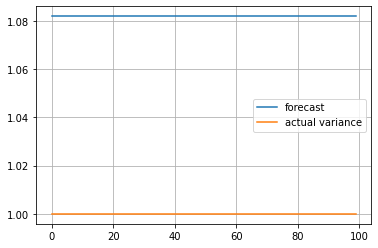

In [25]:
plt.plot(forecast_variance, label='forecast')
plt.plot([variance] * n_test, label='actual variance')

plt.legend()
plt.grid()
plt.show()

# Reading files

In [26]:
rtsi = pd.read_csv('files/RI.RTSI_790101_211016.csv', sep=',')

In [27]:
(rtsi['<TICKER>'] != 'RI.RTSI').any()

False

In [28]:
(rtsi['<TIME>'] != '00:00:00').any()

False

In [29]:
rtsi.drop(columns=['<PER>', '<TIME>', '<TICKER>'], inplace=True)

In [30]:
rtsi['<DATE>'] = pd.to_datetime(rtsi['<DATE>'], format='%Y%m%d')

In [31]:
rtsi.set_index('<DATE>', inplace=True)

In [32]:
rtsi['return'] = rtsi['<CLOSE>'].pct_change(1)

In [33]:
rtsi['log return'] = calc_log_returns(rtsi['<CLOSE>'])  # rtsi['<CLOSE>'].rolling(2).apply(lambda values: np.log(values[1] / values[0])).copy()

In [34]:
rtsi = rtsi.iloc[1:].copy()

In [35]:
rtsi.isna().any()

<OPEN>        False
<HIGH>        False
<LOW>         False
<CLOSE>       False
<VOL>         False
return        False
log return    False
dtype: bool

In [36]:
rtsi

,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,return,log return
<DATE>,,,,,,,
2001-02-18,180.10,180.10,180.10,180.10,0,0.000000,0.000000
2001-02-19,180.10,181.21,176.67,177.29,0,-0.015602,-0.015725
2001-02-20,177.29,179.90,175.28,176.45,0,-0.004738,-0.004749
2001-02-21,176.45,176.45,161.12,162.39,0,-0.079683,-0.083037
2001-02-22,162.39,168.35,162.39,168.31,0,0.036455,0.035807
...,...,...,...,...,...,...,...
2021-10-11,1871.73,1883.71,1867.58,1882.43,1769145502,0.011537,0.011471
2021-10-12,1867.15,1876.79,1860.64,1869.94,1386130631,-0.006635,-0.006657
2021-10-13,1869.05,1869.05,1835.80,1855.11,1830447018,-0.007931,-0.007962


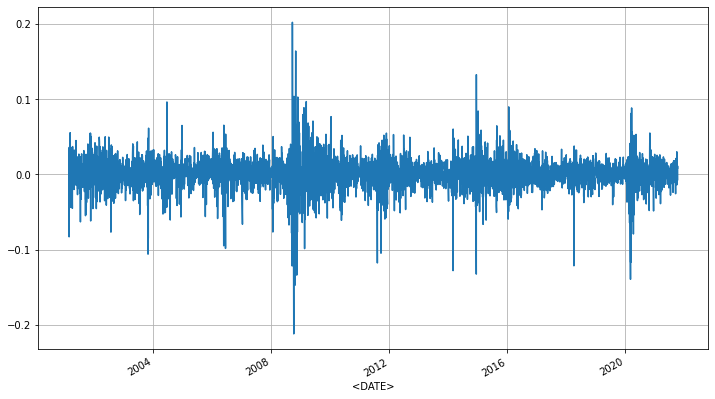

In [37]:
rtsi['log return'].plot(figsize=(12, 7))

plt.grid()
plt.show()

In [38]:
rtsi['log return'].describe()

count    5174.000000
mean        0.000455
std         0.020327
min        -0.211994
25%        -0.008822
50%         0.001318
75%         0.010414
max         0.202039
Name: log return, dtype: float64

# Testing `train`

In [39]:
logging.basicConfig(level=logging.DEBUG)

In [40]:
rescale_factor = 100

In [41]:
start_date = '2010-01-01'

In [42]:
input_data = rtsi['log return'].loc[start_date:].copy() * rescale_factor
clusterization_method = 'gaussian'
local_method = 'garch'
local_method_parameters = {'p': 1, 'q': 1, 'mean': 'Zero', 'dist': 'normal'}

In [43]:
n = input_data.shape[0]

In [44]:
mu = 0
sigma = .02 * rescale_factor

centers = np.array([[mu] * n])
cov_matrices = np.array([np.diag([sigma] * n, k=0)])

In [45]:
clusterization_parameters = {'centers': centers, 'cov_matrices': cov_matrices, 'n_clusters': 1}

In [46]:
train_model(input_data,
            clusterization_method=clusterization_method,
            clusterization_parameters=clusterization_parameters,
            local_method=local_method,
            local_method_parameters=local_method_parameters)

DEBUG:train_model:Starting clusterization
DEBUG:cluster_input:clustering method is gaussian
DEBUG:cluster_input:parameters is not None
INFO:calc_gaussian_membership_degrees:Starting
DEBUG:pdf:log_pdf = -6079.516519855979, type(log_pdf) = <class 'numpy.float64'>
DEBUG:pdf:long_log_pdf = -6079.516519855979, type(long_log_pdf) = <class 'numpy.float128'>
DEBUG:train_model:Clusterization completed
Estimated parameters: {'centers': array([[0, 0, 0, ..., 0, 0, 0]]), 'cov_matrices': array([[[2., 0., 0., ..., 0., 0., 0.],
        [0., 2., 0., ..., 0., 0., 0.],
        [0., 0., 2., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 2., 0., 0.],
        [0., 0., 0., ..., 0., 2., 0.],
        [0., 0., 0., ..., 0., 0., 2.]]]), 'n_clusters': 1}
Membership degrees:
[5.0063682e-2641]
DEBUG:train_model:Starting to run local model for each rule
DEBUG:apply_local_model:Method is GARCH
DEBUG:train_model:Local model runs for each rule are completed. rules_outputs: [[1.81711941]]
DEBUG:train_model:Sta

Iteration:      1,   Func. Count:      5,   Neg. LLF: 18208.402879687113
Iteration:      2,   Func. Count:     14,   Neg. LLF: 179841745.16303405
Iteration:      3,   Func. Count:     19,   Neg. LLF: 6259.643369009693
Iteration:      4,   Func. Count:     26,   Neg. LLF: 5746.523881004245
Iteration:      5,   Func. Count:     31,   Neg. LLF: 5518.704480234793
Iteration:      6,   Func. Count:     35,   Neg. LLF: 5518.7020679092275
Iteration:      7,   Func. Count:     39,   Neg. LLF: 5518.701967731444
Iteration:      8,   Func. Count:     43,   Neg. LLF: 5518.7019340838815
Iteration:      9,   Func. Count:     46,   Neg. LLF: 5518.701934085554
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5518.7019340838815
            Iterations: 9
            Function evaluations: 46
            Gradient evaluations: 9


1.8171194100517129577

## Same data fed to GARCH(1, 1)

In [47]:
model = arch_model(input_data, mean=local_method_parameters['mean'], vol='GARCH', p=p, q=q,
                   dist=local_method_parameters['dist'])

In [48]:
fitted = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 18208.402879687113
Iteration:      2,   Func. Count:     14,   Neg. LLF: 179841745.16303405
Iteration:      3,   Func. Count:     19,   Neg. LLF: 6259.643369009693
Iteration:      4,   Func. Count:     26,   Neg. LLF: 5746.523881004245
Iteration:      5,   Func. Count:     31,   Neg. LLF: 5518.704480234793
Iteration:      6,   Func. Count:     35,   Neg. LLF: 5518.7020679092275
Iteration:      7,   Func. Count:     39,   Neg. LLF: 5518.701967731444
Iteration:      8,   Func. Count:     43,   Neg. LLF: 5518.7019340838815
Iteration:      9,   Func. Count:     46,   Neg. LLF: 5518.701934085554
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5518.7019340838815
            Iterations: 9
            Function evaluations: 46
            Gradient evaluations: 9


In [49]:
fitted.summary

<bound method ARCHModelResult.summary of                        Zero Mean - GARCH Model Results                        
Dep. Variable:             log return   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5518.70
Distribution:                  Normal   AIC:                           11043.4
Method:            Maximum Likelihood   BIC:                           11061.4
                                        No. Observations:                 2965
Date:                Mon, Oct 18 2021   Df Residuals:                     2965
Time:                        22:25:15   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.

In [50]:
fitted.params

omega       0.059160
alpha[1]    0.081849
beta[1]     0.900093
Name: params, dtype: float64

In [58]:
forecast = fitted.forecast(reindex=False, horizon=1)

In [59]:
forecast_variance = forecast.variance.values[0]

In [60]:
forecast_variance

array([1.81711941])